In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
img = cv2.imread("2.jpg")
param=3

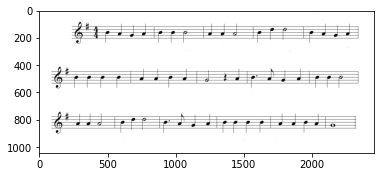

In [3]:
plt.imshow(img)

In [4]:
img.shape

(1043, 2456, 3)

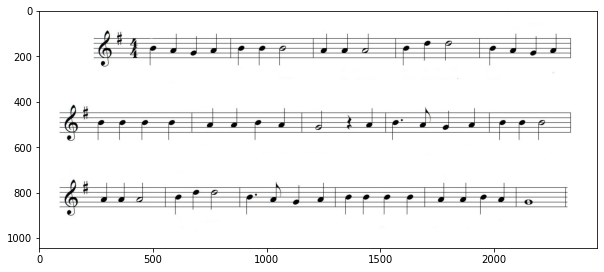

In [5]:
plt.figure(figsize=[10,10])
plt.imshow(img)

Gray scaled Img

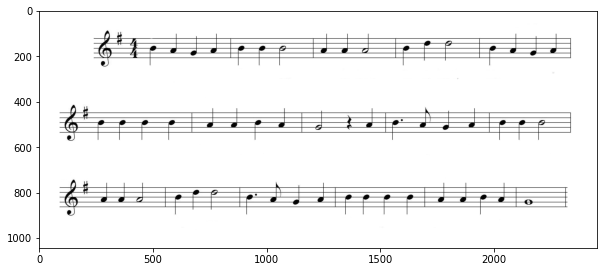

In [6]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=[10,10])
plt.imshow(img_gray,cmap="gray")

In [7]:
img_gray.shape

(1043, 2456)

Used Otsu's thresholding

In [8]:
value,thr_img = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [9]:
value

129.0

In [10]:
thr_img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

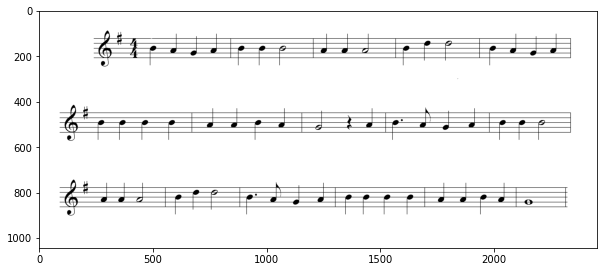

In [11]:
plt.figure(figsize=[10,10])
plt.imshow(thr_img,cmap="gray")

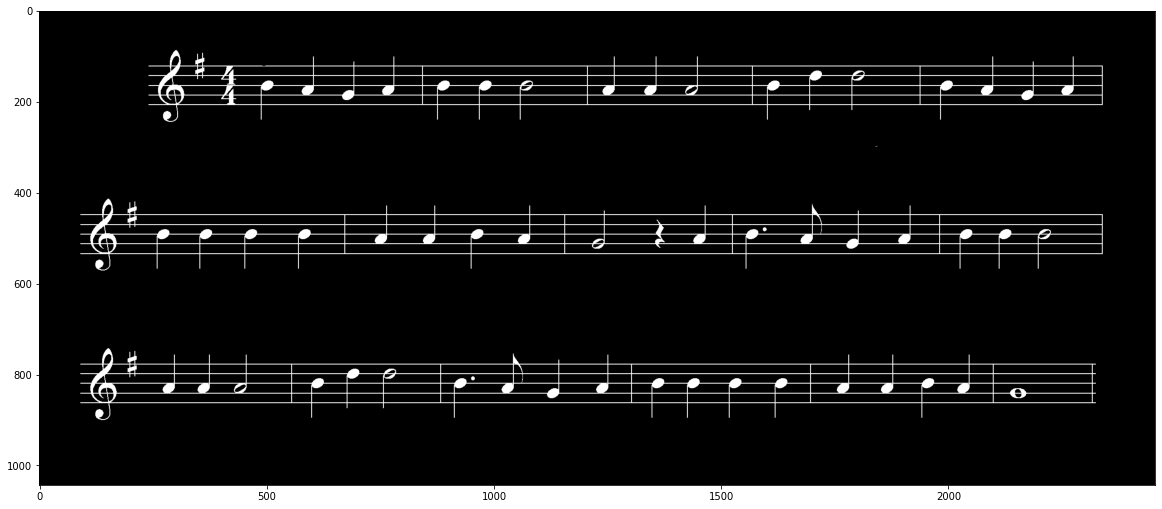

In [12]:
inv = 255-thr_img
plt.figure(figsize=[20,20])
plt.imshow(inv,cmap="gray")

In [13]:
np.unique(inv)

array([  0, 255], dtype=uint8)

In [14]:
kernel = np.ones((1,100),np.uint8)

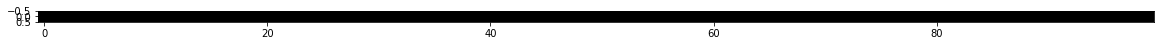

In [15]:
plt.figure(figsize=[20,20])
plt.imshow(kernel,cmap="gray")

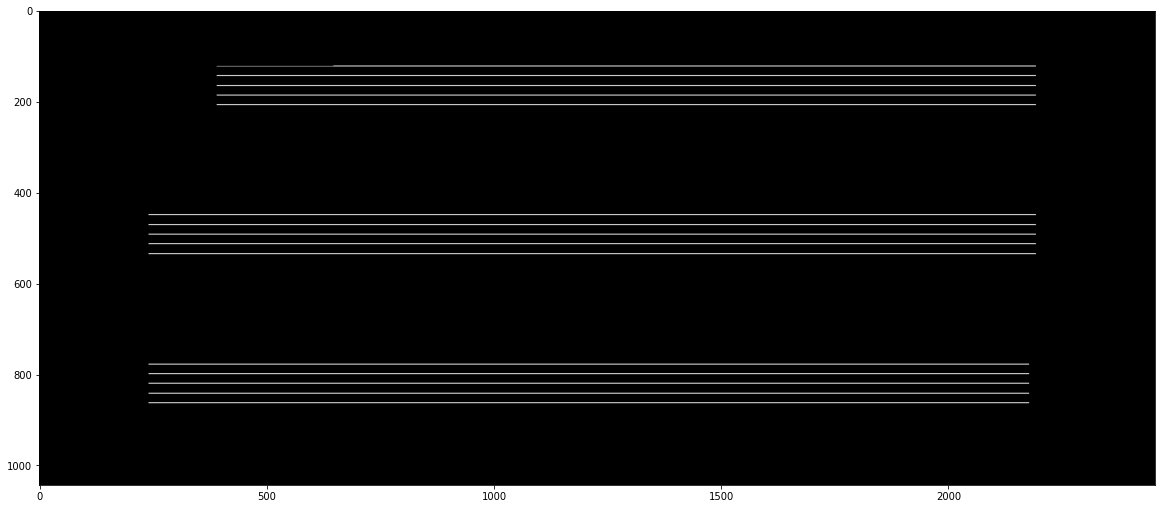

In [16]:
erosion = cv2.erode(inv,kernel,iterations = 1)
plt.figure(figsize=[20,20])
erosion = cv2.erode(erosion,kernel,iterations = 1)
erosion = cv2.erode(erosion,kernel,iterations = 1)


plt.imshow(erosion,cmap='gray')



In [17]:
reduced_width=cv2.reduce(erosion,1, cv2.REDUCE_AVG).reshape(-1)
h = img.shape[0]
w = img.shape[1]
result = np.zeros((h,w))

In [18]:
for row in range(h):
    if reduced_width[row]>0:
        cv2.line(result, (0,row), (w,row), (255), 1)

Horizontal Projection Image

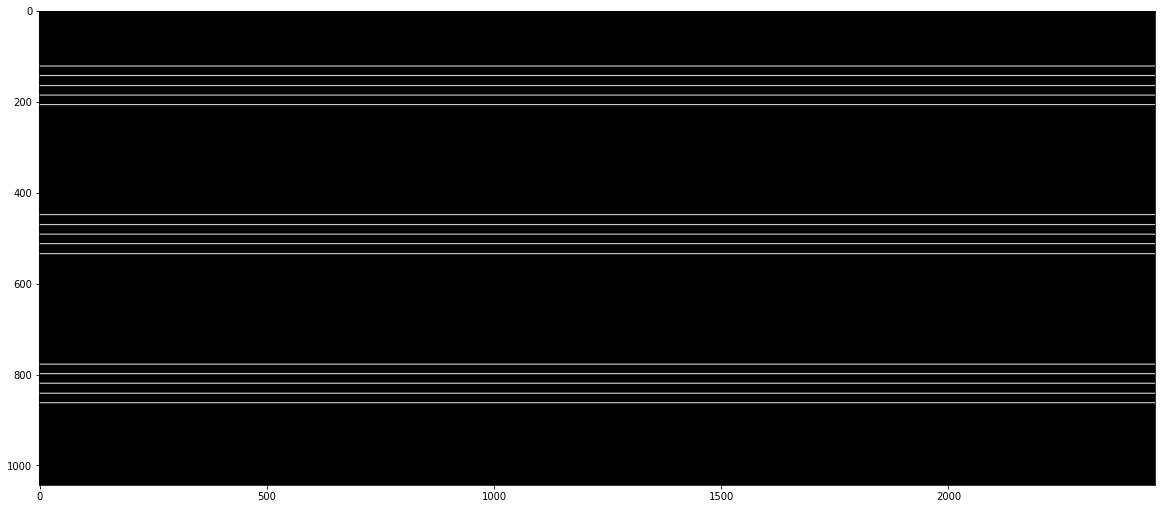

In [19]:
plt.figure(figsize=[20,20])
plt.imshow(result,cmap='gray')

In [20]:
notesonly = cv2.subtract(inv,result.astype(np.uint8))

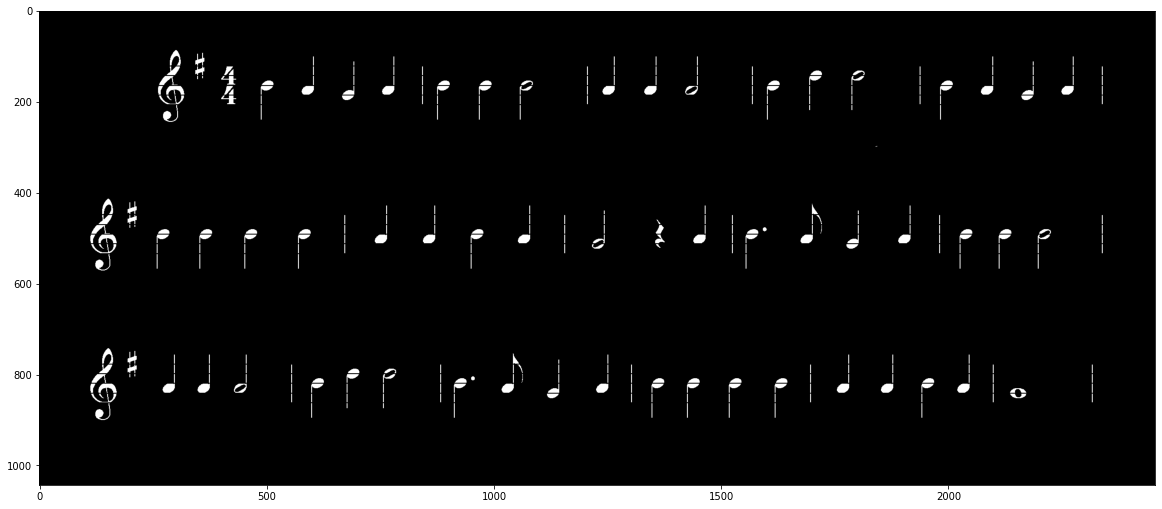

In [21]:
plt.figure(figsize=[20,20])
plt.imshow(notesonly,cmap='gray')

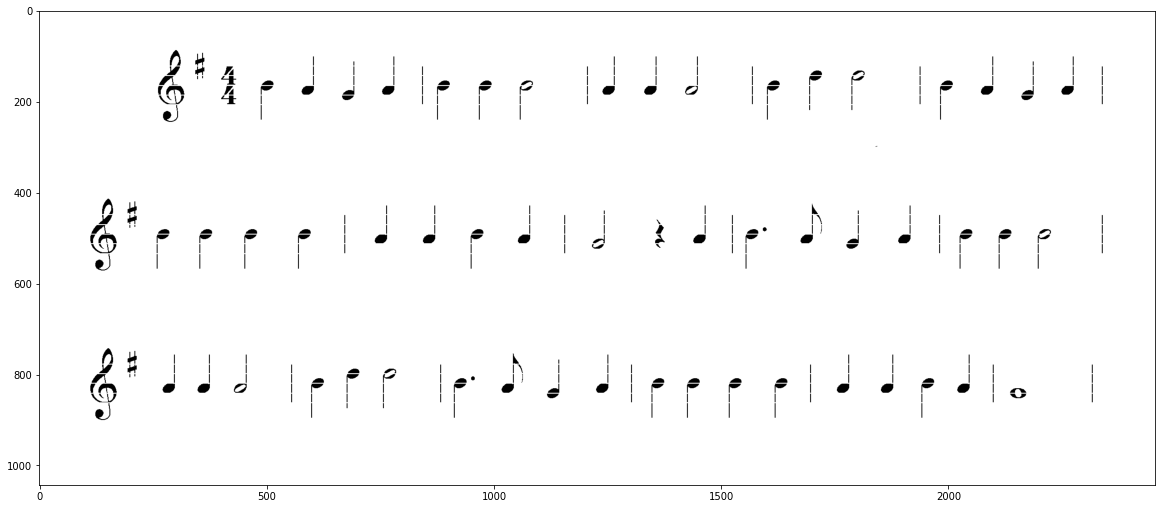

In [22]:
inv_notesonly = 255-notesonly
plt.figure(figsize=[20,20])
plt.imshow(inv_notesonly,cmap='gray')

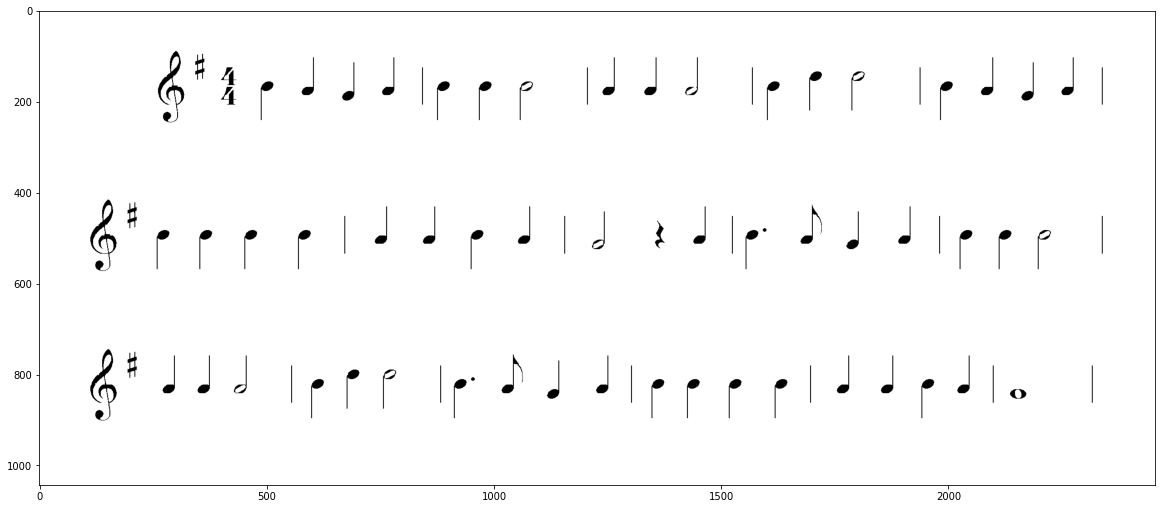

In [23]:
kernel3 = np.ones((param,1),np.uint8)
ero_inv_notes_only = cv2.erode(inv_notesonly,kernel3,iterations = 1)
ero_inv_notes_only = cv2.morphologyEx(ero_inv_notes_only, cv2.MORPH_CLOSE, np.ones((4,1)))
ero_inv_notes_only = cv2.dilate(ero_inv_notes_only, np.ones((4,1)), iterations = 1)

plt.figure(figsize=[20,20])
plt.imshow(ero_inv_notes_only,cmap='gray')

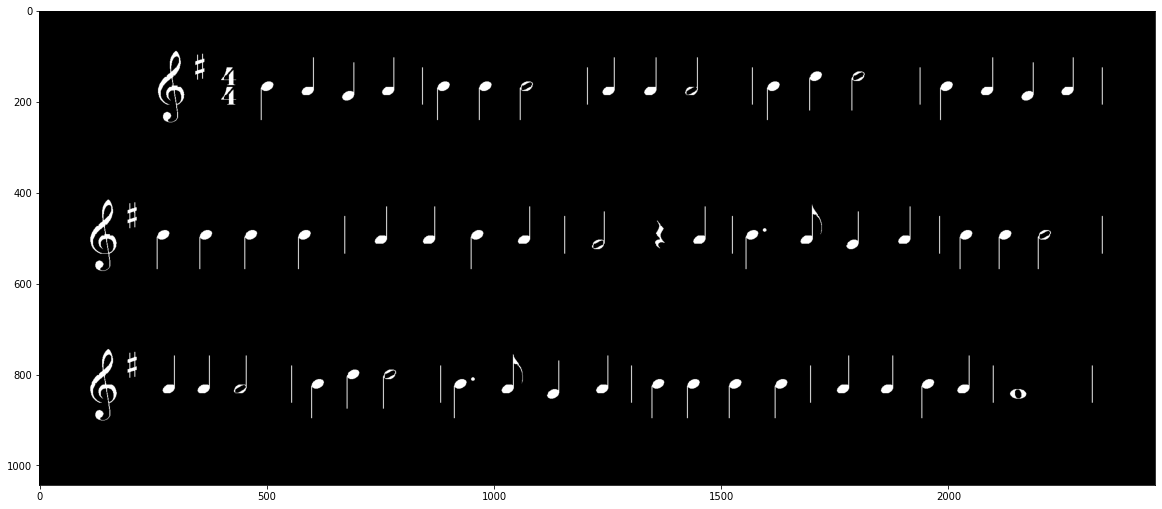

In [24]:
ero_notesonly = 255 - ero_inv_notes_only
plt.figure(figsize=[20,20])
plt.imshow(ero_notesonly,cmap='gray')

In [25]:
kernel2 = np.ones((40,1),np.uint8)

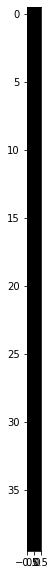

In [26]:
plt.figure(figsize=[10,10])
plt.imshow(kernel2,cmap='gray')

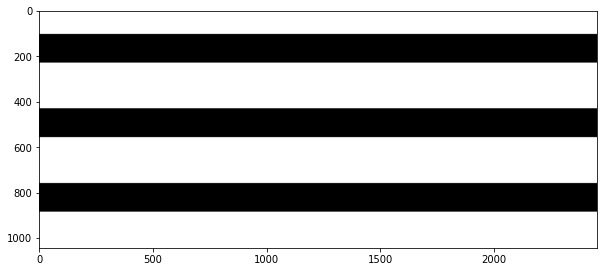

In [27]:
ver1 = cv2.erode(255-result,kernel2,iterations = 1)
plt.figure(figsize=[10,10])
plt.imshow(ver1,cmap='gray')

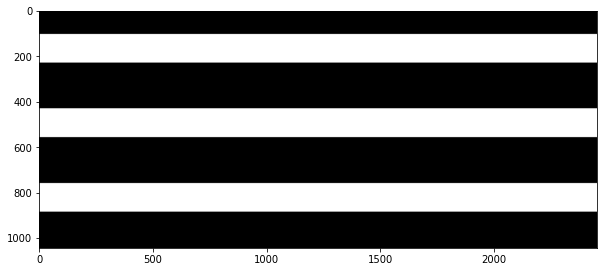

In [28]:
ver1 = 255-ver1
plt.figure(figsize=[10,10])
plt.imshow(ver1,cmap='gray')

101
227
428
555
757
883
1041


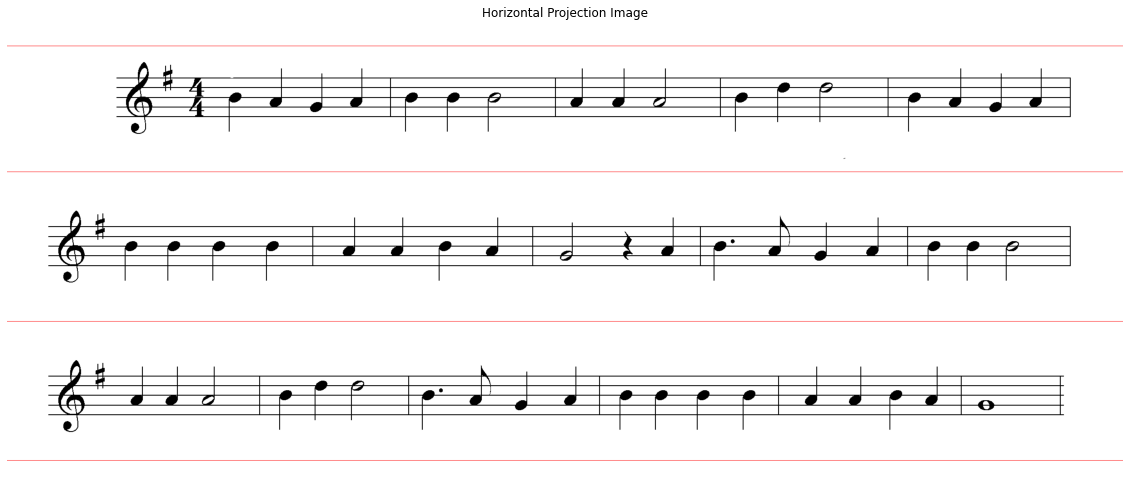

In [29]:
hist = cv2.reduce(ver1,1, cv2.REDUCE_AVG).reshape(-1)

lines=[]
flag=0
start=0
H,W = img.shape[:2]
for y in range(H-1):
    if hist[y]==255 or y==H-2:
        if flag==0:
            lines.append(start+int((y-start)/2))
            print(y)
            flag=1
    elif hist[y]==0 and flag==1:
        flag=0
        start=y
        print(start)
        
bi=thr_img
bi = cv2.cvtColor(bi, cv2.COLOR_GRAY2BGR)
for y in lines:
    cv2.line(bi, (0,y), (W, y), (255,0,0), 1)

plt.figure(figsize=[20,20])
plt.imshow(bi)
plt.axis('off')
plt.title('Horizontal Projection Image')
plt.show()

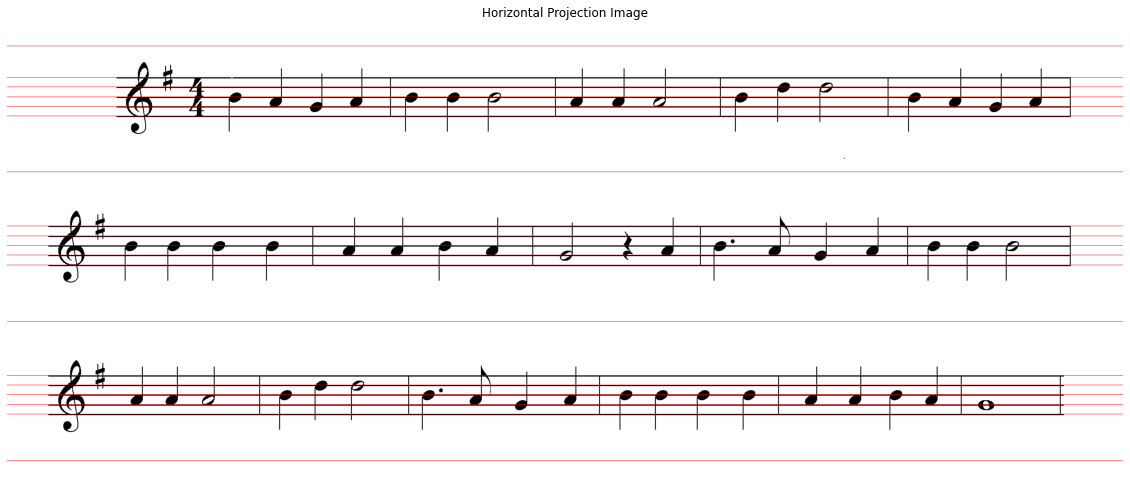

In [30]:
hist2 = cv2.reduce(result,1, cv2.REDUCE_AVG).reshape(-1)

staves=[]
flag=0
start=0
H,W = img.shape[:2]
for y in range(H-1):
    if hist2[y]<1 and hist2[y+1]>1:
        staves.append(y)
        

for y in staves:
    cv2.line(bi, (0,y), (W, y), (255,0,0), 1)

plt.figure(figsize=[20,20])
plt.imshow(bi)
plt.axis('off')
plt.title('Horizontal Projection Image')
plt.show()



In [31]:
from scipy import stats
def group(L):
    first = last = L[0]
    for n in L[1:]:
        if n - 1 == last: # Part of the group, bump the end
            last = n
        else: # Not part of the group, yield current group and start a new
            yield first, last
            first = last = n
    yield first, last # Yield the last group


# Cleft detection 

<Figure size 720x720 with 0 Axes>

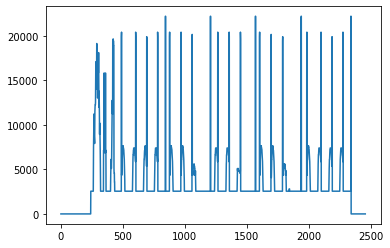

<Figure size 720x720 with 0 Axes>

In [32]:
i=0
notes_row=inv[lines[i]:lines[i+1],:]
plt.plot(np.sum(notes_row, axis=0))
plt.figure(figsize=[10,10])


From the left side, the first element that the staves are touching is the cleft

In [33]:
first_row_first_stave = staves[0]
second_row_first_stave = staves[int(len(staves)/3)*1]
third_row_first_stave = staves[int(len(staves)/3)*2]

In [34]:
first_row_first_stave, second_row_first_stave, third_row_first_stave

(119, 446, 775)

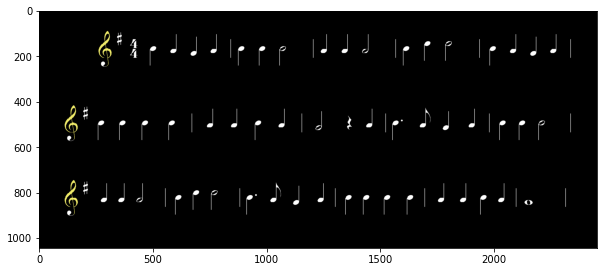

In [35]:
yellow = [242,237,106]
bw_notes = ero_notesonly.copy()
fir_col,sec_col,thir_col = -1,-1,-1
wid = bw_notes.shape[1]
bw_notes3d = cv2.cvtColor(bw_notes, cv2.COLOR_GRAY2BGR)

for j in range(wid):
    if bw_notes[first_row_first_stave][j]==255:
        fir_col = j
        break
for j in range(wid):
    if bw_notes[second_row_first_stave][j]==255:
        sec_col = j
        break
for j in range(wid):
    if bw_notes[third_row_first_stave][j]==255:
        thir_col = j
        break
        
start_points = [[first_row_first_stave,fir_col],[second_row_first_stave,sec_col],[third_row_first_stave,thir_col]]

def dfs(point):
    row,col = point[0], point[1]
    dx = [-1,1,0,0]
    dy = [0,0,1,-1]
    
    for i in range(4):
        nrow = row+dx[i]
        ncol = col+dy[i]
        if bw_notes[nrow][ncol]==255:
            bw_notes[nrow][ncol] = 0
            bw_notes3d[nrow][ncol][0] = yellow[0]
            bw_notes3d[nrow][ncol][1] = yellow[1]
            bw_notes3d[nrow][ncol][2] = yellow[2]
            dfs([nrow,ncol])
    
    

for point in start_points:
    dfs(point)
    
i_array=255-inv
i_array=cv2.morphologyEx(i_array, cv2.MORPH_CLOSE, np.ones((1,2)))
i_array=255-i_array

cleft=np.zeros(len(lines)-1)
for j in range(len(lines)-1):
    notes_row=i_array[lines[j]:lines[j+1],:]
    sum1=np.sum(notes_row, axis=0)
    mode_val=stats.mode(sum1[sum1!=0])[0][0]
    indcs=np.where(sum1!=mode_val)
    indcs_list=list(group(indcs[0]))
    c=1
    a=indcs_list[1][0]
    b=indcs_list[1][1]

    if(np.sum(inv[staves[5*(j+1)-1]+5:lines[j+1],a:b])>0):
        cleft[j]=0
    else:
        cleft[j]=1

plt.figure(figsize=[10,10])
plt.imshow(bw_notes3d,cmap='gray')

Clefts are yellow in color

# Quarter Notes Detection

In [36]:
def circle_element(r):
    s=np.zeros((2*r+1,2*r+1))
    for i in range(2*r+1):
        for j in range(2*r+1):
            if(np.sqrt((i-r)**2+(j-r)**2)<=r):
                s[i,j]=1
    return np.uint8(s)

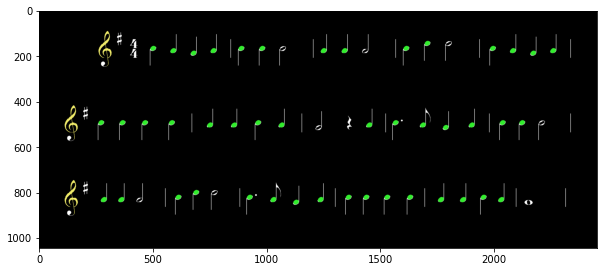

In [37]:
green = [50,237,45]
for i in range(len(lines)-1):
    notes_row=inv[lines[i]:lines[i+1],:]
    bw_notes3d_row=bw_notes3d[lines[i]:lines[i+1],:]
    morphed_row=cv2.morphologyEx(notes_row, cv2.MORPH_OPEN, circle_element(int(0.47*(staves[1]-staves[0]))))
    bw_notes3d_row[morphed_row>0,0]=green[0]
    bw_notes3d_row[morphed_row>0,1]=green[1]
    bw_notes3d_row[morphed_row>0,2]=green[2]
    bw_notes3d[lines[i]:lines[i+1],:]=bw_notes3d_row.copy()
plt.figure(figsize=[10,10])
plt.imshow(bw_notes3d)

# 1/8th Notes Detection

In [38]:
def vertical_element(r):
    s=np.zeros((r,r))
    s[:,int(r/2)]=1
    return np.uint8(s)
vertical_element(5)

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [39]:
def horizontal_element(r):
    s=np.zeros((r,r))
    s[int(r/2),:]=1
    return np.uint8(s)
horizontal_element(5)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

In [40]:
def diagonal_element(r,w):
    s=np.zeros((r,r))
    s[:r-w,int(r/2)]=1
    for i in range(w):
        s[i,int(r/2)+i]=1
        s[r-w+i,int(r/2)-i]=1
    return np.uint8(s)
diagonal_element(21,6)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [41]:
def diagonal_element_inverted(r,w):
    s=np.zeros((r-w,r-w))
    s[:,int(r/2)]=1
    for i in range(w):
        s[i,int(r/2)+i]=1
        s[-i-1,int(r/2)+i]=1
    return np.uint8(s)
diagonal_element_inverted(21,4)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [42]:
staves[3]-staves[0]

64

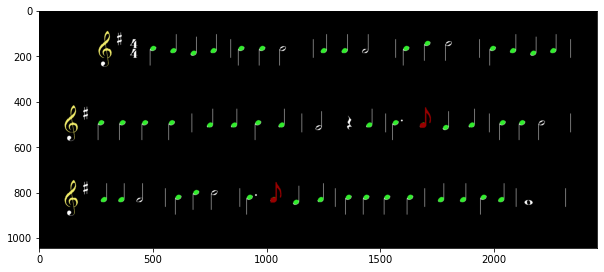

In [43]:
red = [153,0,0]
for i in range(len(lines)-1):
    notes_row=inv[lines[i]:lines[i+1],:]
    bw_notes3d_row=bw_notes3d[lines[i]:lines[i+1],:]
    morphed_row=cv2.morphologyEx(notes_row, cv2.MORPH_OPEN, diagonal_element(staves[3]-staves[0],8))
    indcs=np.where(morphed_row == 255)
    if(len(indcs[0])>0):
        indcs1=np.where(np.sum(morphed_row,axis=0)>0)
        indcs_list=list(group(indcs1[0]))
        for j in range(len(indcs_list)):
            a=indcs_list[j][0]-15
            b=indcs_list[j][1]+15
            morphed_row[:,a:b]=ero_notesonly[lines[i]:lines[i+1],a:b]
    morphed_row=cv2.dilate(morphed_row,np.ones((3,3)),iterations=2)        
    bw_notes3d_row[morphed_row>0,0]=red[0]
    bw_notes3d_row[morphed_row>0,1]=red[1]
    bw_notes3d_row[morphed_row>0,2]=red[2]
    bw_notes3d[lines[i]:lines[i+1],:]=bw_notes3d_row.copy()
plt.figure(figsize=[10,10])
plt.imshow(bw_notes3d)
    

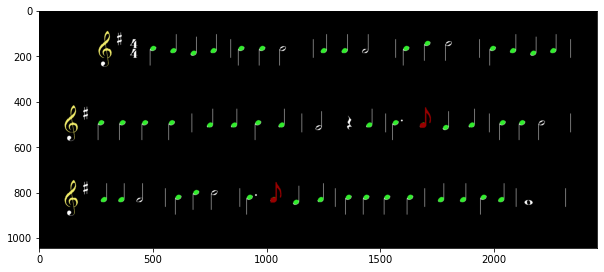

In [44]:
red = [153,0,0]
for i in range(len(lines)-1):
    notes_row=inv[lines[i]:lines[i+1],:]
    bw_notes3d_row=bw_notes3d[lines[i]:lines[i+1],:]
    morphed_row=cv2.morphologyEx(notes_row, cv2.MORPH_OPEN, diagonal_element_inverted(staves[3]-staves[0],5))
    indcs=np.where(morphed_row == 255)
    if(len(indcs[0])>0):
        indcs1=np.where(np.sum(morphed_row,axis=0)>0)
        indcs_list=list(group(indcs1[0]))
        for j in range(len(indcs_list)):
            a=indcs_list[j][0]
            b=indcs_list[j][1]+25
            morphed_row[:,a:b]=ero_notesonly[lines[i]:lines[i+1],a:b]
    morphed_row=cv2.dilate(morphed_row,np.ones((3,3)),iterations=2)
    bw_notes3d_row[morphed_row>0,0]=red[0]
    bw_notes3d_row[morphed_row>0,1]=red[1]
    bw_notes3d_row[morphed_row>0,2]=red[2]
    bw_notes3d[lines[i]:lines[i+1],:]=bw_notes3d_row.copy()
plt.figure(figsize=[10,10])
plt.imshow(bw_notes3d)

# KeyNote Signature Detection

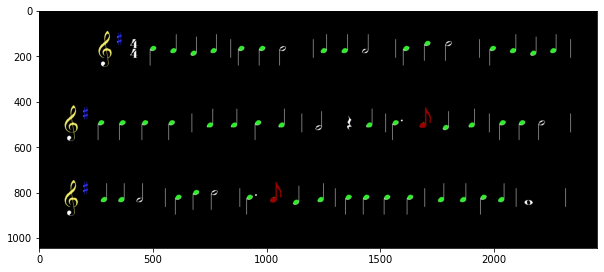

In [45]:
blue = [45,47,245]
no_hashes_list=[]
no_bs_list=[]
for j in range(len(lines)-1):
    notes_row=inv[lines[j]:lines[j+1],:]
    bw_notes3d_row=bw_notes3d[lines[j]:lines[j+1],:]
    sum1=np.sum(i_array[lines[j]:lines[j+1],:], axis=0)
    mode_val=stats.mode(sum1[sum1!=0])[0][0]
    indcs=np.where(sum1!=mode_val)
    indcs_list=list(group(indcs[0]))
    no_of_hashes=0
    no_of_bs=0
    for i in range(2,7):
        a=indcs_list[i][0]
        b=indcs_list[i][1]
        if(a==b):
            continue
        nr = notes_row[:,a:b]
        bw_n3d_r=bw_notes3d_row[:,a:b]
        morphed_row=cv2.morphologyEx(nr, cv2.MORPH_OPEN, vertical_element(30))
        z=np.int16(np.sum(morphed_row,axis=0))
        z[z>0]=1
        diff_array=z[1:]-z[:-1]
        count=sum(diff_array>0)
        if(count>0 and count%2==0):
            no_of_hashes+=int(count/2)
            bw_n3d_r[bw_n3d_r[:,:,0]>0,0]=blue[0]
            bw_n3d_r[bw_n3d_r[:,:,1]>0,1]=blue[1]
            bw_n3d_r[bw_n3d_r[:,:,2]>0,2]=blue[2]
            bw_notes3d_row[:,a:b]=bw_n3d_r.copy()
    if(no_of_hashes==0):
        for i in range(2,7):
            a=indcs_list[i][0]
            b=indcs_list[i][1]
            if(a==b):
                continue
            bw_n3d_r=bw_notes3d_row[:,a:b]    
            z=ero_notesonly[lines[j]:lines[j+1],a:b]
            z1=cv2.morphologyEx(z, cv2.MORPH_CLOSE, circle_element(4))
            z=z1-z
            f=cv2.morphologyEx(z, cv2.MORPH_OPEN, circle_element(2))
            f1=np.sum(f,axis=1)
            f1=np.int16(f1)
            f1[f1>0]=1
            f1=f1[1:]-f1[:-1]
            if(np.sum(ero_notesonly[staves[5*j+3]+2:staves[5*j+4]-2,a:b])):
                continue
            if(np.sum(f>0)>0):
                print(i,j,np.sum(f1>0))
                no_of_bs+=np.sum(f1>0)
                if(no_of_bs>0):
                    bw_n3d_r[bw_n3d_r[:,:,0]>0,0]=blue[0]
                    bw_n3d_r[bw_n3d_r[:,:,1]>0,1]=blue[1]
                    bw_n3d_r[bw_n3d_r[:,:,2]>0,2]=blue[2]
                    bw_notes3d_row[:,a:b]=bw_n3d_r.copy()

    bw_notes3d[lines[j]:lines[j+1],:]= bw_notes3d_row.copy()       
    no_hashes_list.append(no_of_hashes)
    no_bs_list.append(no_of_bs)
plt.figure(figsize=[10,10])
plt.imshow(bw_notes3d)

# 1/8th, 1/16th and 1/32th Notes Detection

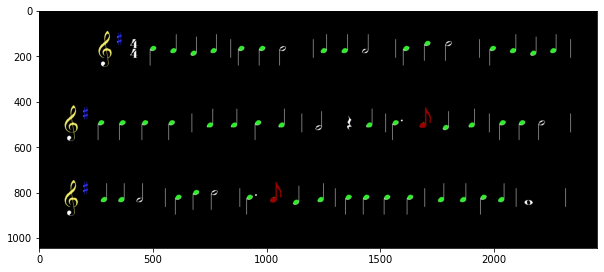

In [46]:
pink=[255,0,127]
aqua=[135,206,235]
for j in range(len(lines)-1):
    notes_row=inv[lines[j]:lines[j+1],:]
    bw_notes3d_row=bw_notes3d[lines[j]:lines[j+1],:]
    sum1=np.sum(notes_row, axis=0)
    mode_val=stats.mode(sum1[sum1!=0])[0][0]
    indcs=np.where(sum1!=mode_val)
    indcs_list=list(group(indcs[0]))
    for i in range(3,len(indcs_list)):
        a=indcs_list[i][0]
        b=indcs_list[i][1]
        element_size=45
        if(a==b or abs(a-b)<35):
            continue
        nr = ero_notesonly[lines[j]:lines[j+1],a:b]
        bw_n3d_r=bw_notes3d_row[:,a:b]

        morphed_row1=cv2.morphologyEx(nr, cv2.MORPH_OPEN, circle_element(int(0.3*(staves[1]-staves[0]))))
        z1=np.int16(np.sum(morphed_row1,axis=0))
        z1[0]=0
        z1[-1]=0
        z1[z1>0]=1
        diff_array1=z1[1:]-z1[:-1]

        element_size=18
        morphed_row=cv2.morphologyEx(nr-morphed_row1, cv2.MORPH_OPEN, horizontal_element(element_size))
        z=np.int16(np.sum(morphed_row,axis=1))
        z[0]=0
        z[-1]=0
        z[z>0]=1
        diff_array=z[1:]-z[:-1]
        z2=np.int16(np.sum(morphed_row,axis=0))
        if(sum(z2)<element_size):
            continue
        bw_n3d_r=bw_notes3d_row[:,a:b]
        if(np.sum(diff_array>0) and np.sum(diff_array1>0)):
            rois=np.where(z1==1)
            grps=list(group(rois[0]))
            for k in range(len(grps)):
                z_elem=np.int16(np.sum(morphed_row[:,grps[k][0]-1:grps[k][1]+5],axis=1))
                z_elem[0]=0
                z_elem[-1]=0
                z_elem[z_elem>0]=1
                z_elem_diff_array=z_elem[1:]-z_elem[:-1]
                beams=np.sum(z_elem_diff_array>0)
                final_thres=np.zeros(nr.shape)
                if(k==0):
                    final_thres[:,grps[k][0]:int((grps[k][1]+grps[k+1][0])/2)]=nr[:,grps[k][0]:int((grps[k][1]+grps[k+1][0])/2)]
                elif(k==(len(grps)-1)):
                    final_thres[:,int((grps[k][0]+grps[k-1][1])/2):grps[k][1]+5]=nr[:,int((grps[k][0]+grps[k-1][1])/2):grps[k][1]+5]
                else:
                    final_thres[:,int((grps[k][0]+grps[k-1][1])/2):int((grps[k][1]+grps[k+1][0])/2)]=nr[:,int((grps[k][0]+grps[k-1][1])/2):int((grps[k][1]+grps[k+1][0])/2)]
                final_thres=cv2.dilate(final_thres,np.ones((3,3)),iterations=2)
                if(beams==1):
                    bw_n3d_r[final_thres>0,0]=red[0]
                    bw_n3d_r[final_thres>0,1]=red[1]
                    bw_n3d_r[final_thres>0,2]=red[2]
                    bw_notes3d_row[:,a:b]=bw_n3d_r.copy()
                elif(beams==2):
                    bw_n3d_r[final_thres>0,0]=pink[0]
                    bw_n3d_r[final_thres>0,1]=pink[1]
                    bw_n3d_r[final_thres>0,2]=pink[2]
                    bw_notes3d_row[:,a:b]=bw_n3d_r.copy()
                elif(beams==3):
                    bw_n3d_r[final_thres>0,0]=aqua[0]
                    bw_n3d_r[final_thres>0,1]=aqua[1]
                    bw_n3d_r[final_thres>0,2]=aqua[2]
                    bw_notes3d_row[:,a:b]=bw_n3d_r.copy()

            
plt.figure(figsize=[10,10])
plt.imshow(bw_notes3d)      

Quarter notes are green in color, Quaver notes are red in color, Semiquaver notes are pink in color, Demisemiquaver notes are aqua in color

# Whole Note and Half Note

In [47]:

def halfnote(crop_img):
    im=crop_img
    im2=cv2.morphologyEx(im, cv2.MORPH_CLOSE, circle_element(5))
    im2=im2-im
    im2=cv2.morphologyEx(im2, cv2.MORPH_OPEN, circle_element(3))
    kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT,(30,30))
    im2=cv2.morphologyEx(im2, cv2.MORPH_DILATE, circle_element(5))
    return im2
def wholenote(crop_img):
    im=crop_img
    im2=cv2.morphologyEx(im, cv2.MORPH_CLOSE, circle_element(7))
    im2_1=cv2.morphologyEx(im, cv2.MORPH_CLOSE, circle_element(6))
    im2=im2-im2_1
    im2=cv2.morphologyEx(im2, cv2.MORPH_OPEN, circle_element(3))
    kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT,(30,30))
    im2=cv2.morphologyEx(im2, cv2.MORPH_DILATE, circle_element(5))
    return im2


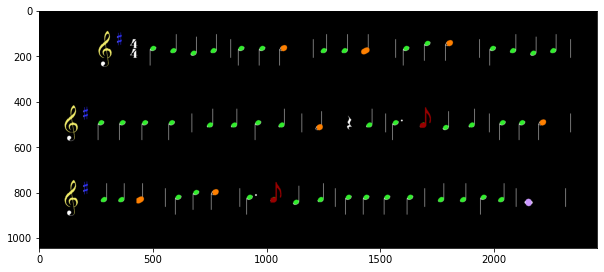

In [48]:
orange=[255,128,0]
violet=[204,153,255]
for j in range(len(lines)-1):
    notes_row=inv[lines[j]:lines[j+1],:]
    bw_notes3d_row=bw_notes3d[lines[j]:lines[j+1],:]
    sum1=np.sum(notes_row, axis=0)
    mode_val=stats.mode(sum1[sum1!=0])[0][0]
    indcs=np.where(sum1!=mode_val)
    indcs_list=list(group(indcs[0]))
    i=5
    a=indcs_list[i][0]
    nr = ero_notesonly[lines[j]:lines[j+1],a:]
    bw_n3d_r=bw_notes3d_row[:,a:]
    final_thres=halfnote(nr)
    final_thres1=wholenote(nr)
    final_thres=cv2.dilate(final_thres,np.ones((3,3)),iterations=2)
    final_thres1=cv2.dilate(final_thres1,np.ones((3,3)),iterations=2) 
    bw_n3d_r[final_thres>0,0]=orange[0]
    bw_n3d_r[final_thres>0,1]=orange[1]
    bw_n3d_r[final_thres>0,2]=orange[2]
    bw_n3d_r[final_thres1>0,0]=violet[0]
    bw_n3d_r[final_thres1>0,1]=violet[1]
    bw_n3d_r[final_thres1>0,2]=violet[2]
    bw_notes3d_row[:,a:]=bw_n3d_r.copy()
    
plt.figure(figsize=[10,10])
plt.imshow(bw_notes3d)      

# Rest Detection

(array([680]),) 4555.961891853126
(array([1366]),) 5709.459446974832


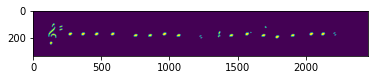

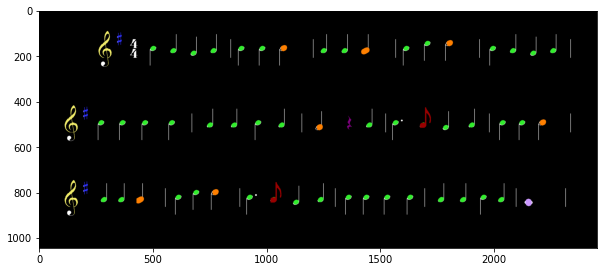

In [49]:
def detectrest(crop_img,staff):    
    vertical_img = np.copy(crop_img)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,2))
    vertical_img = cv2.erode(vertical_img, kernel, iterations=1)
    vertical_img = cv2.dilate(vertical_img, kernel, iterations=1)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,4))
    vertical_img = cv2.erode(vertical_img, kernel, iterations=1)
    vertical_img = cv2.dilate(vertical_img, kernel, iterations=1)
    y = np.array(np.var(vertical_img,axis=0))
   

    if staff==1:
        y[:650] = 0
    if staff==2:
        y[len(y)-150:]=0
    if staff==10:
        plt.imshow(vertical_img)
        y[:250]=0
        y[len(y)-150:]=0
    maxi = np.where(y == np.max(y))
    print(maxi,np.max(y))
    # pixel location for rest
    init = maxi[0][0] - 10
    fin = maxi[0][0] +  10
    # masking objects other than rest
    result=np.copy(crop_img)
    if np.max(y)<=5500:
        result[:,:]=0
    else:
        result[:,0:init] = 0 
        result[:,fin:]=0
    return result
bw = np.copy(bw_notes3d)
for i in range(2):
    backtorgb=np.copy(bw[lines[i]:lines[i+1]])
    if i==0:
        rest=detectrest(ero_notesonly[lines[i]:lines[i+1],:],1)
    else:
        rest=detectrest(ero_notesonly[lines[i]:lines[i+1],:],10)
    
    # // purple
    backtorgb[rest>0,0]=128
    backtorgb[rest>0,1]=0
    backtorgb[rest>0,2]=128

    bw[lines[i]:lines[i+1]]=np.copy(backtorgb)

plt.figure(figsize=(10,10))
plt.imshow(bw)